In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("/content/drive/MyDrive/data.csv")

In [36]:
print(data.head())
print(data.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

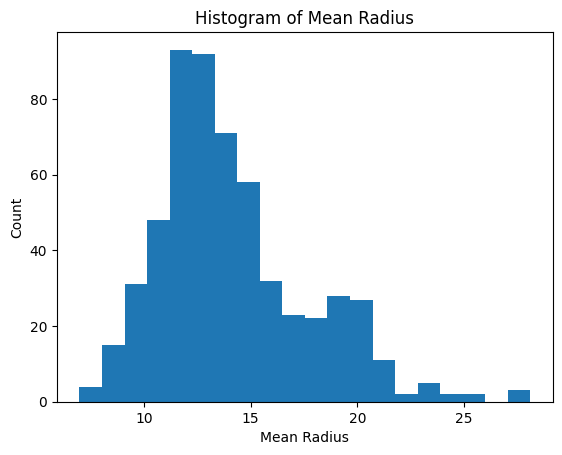

In [51]:
plt.hist(data['radius_mean'], bins=20)
plt.xlabel('Mean Radius')
plt.ylabel('Count')
plt.title('Histogram of Mean Radius')
plt.show()

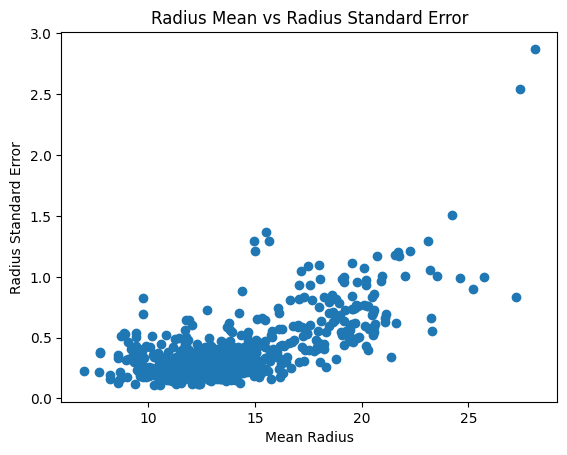

In [52]:
plt.scatter(data['radius_mean'], data['radius_se'])
plt.xlabel('Mean Radius')
plt.ylabel('Radius Standard Error')
plt.title('Radius Mean vs Radius Standard Error')
plt.show()

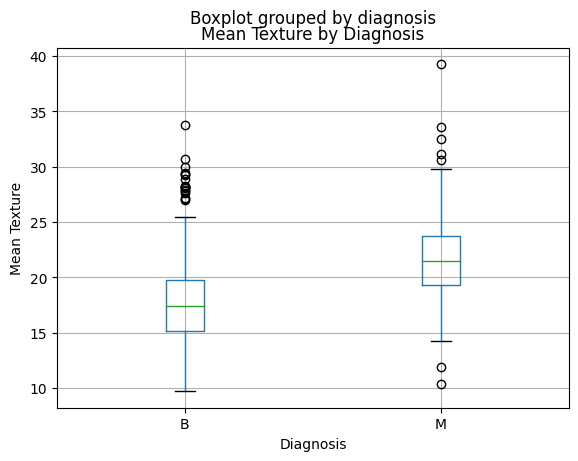

In [53]:
data.boxplot(column='texture_mean', by='diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Texture')
plt.title('Mean Texture by Diagnosis')
plt.show()

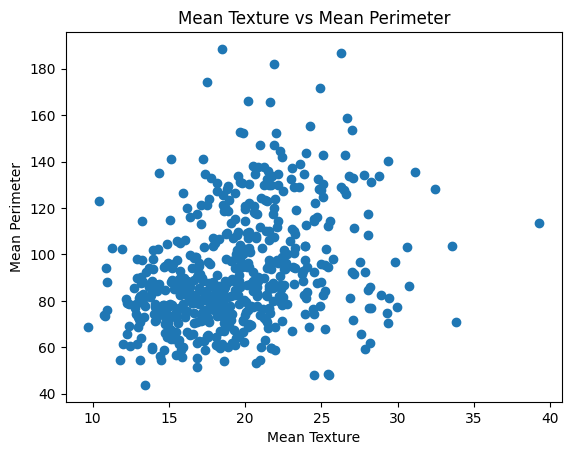

In [55]:
plt.scatter(data['texture_mean'], data['perimeter_mean'])
plt.xlabel('Mean Texture')
plt.ylabel('Mean Perimeter')
plt.title('Mean Texture vs Mean Perimeter')
plt.show()

In [37]:
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
sklearn_lr = LogisticRegression(random_state=42)
sklearn_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [40]:
sklearn_predictions = sklearn_lr.predict(X_test)

In [41]:
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

In [42]:
sklearn_precision = precision_score(y_test, sklearn_predictions, pos_label='M')
sklearn_recall = recall_score(y_test, sklearn_predictions, pos_label='M')
sklearn_f1 = f1_score(y_test, sklearn_predictions, pos_label='M')

print("Sklearn Logistic Regression Results:")
print(f"Accuracy: {sklearn_accuracy:.4f}")
print(f"Precision: {sklearn_precision:.4f}")
print(f"Recall: {sklearn_recall:.4f}")
print(f"F1 Score: {sklearn_f1:.4f}")

Sklearn Logistic Regression Results:
Accuracy: 0.6316
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(y, y_pred):
    m = len(y)
    return (-1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))


def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for i in range(iterations):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= learning_rate * gradient
        cost = cost_function(y, y_pred)
        cost_history.append(cost)

    return theta, cost_history

In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

learning_rate = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_train_custom, y_train_encoded, learning_rate, iterations)


<ipython-input-43-15ac989014b7>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-43-15ac989014b7>:8: RuntimeWarning: divide by zero encountered in log
  return (-1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-43-15ac989014b7>:8: RuntimeWarning: invalid value encountered in multiply
  return (-1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))


In [45]:
custom_predictions = sigmoid(np.dot(X_test_custom, theta))
custom_predictions = [1 if x >= 0.5 else 0 for x in custom_predictions]

<ipython-input-43-15ac989014b7>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_custom)
X_test_scaled = scaler.transform(X_test_custom)

np.random.seed(0)
theta = np.random.rand(X_train_scaled.shape[1])

learning_rate = 0.01
iterations = 10000

for i in range(iterations):
    z = np.dot(X_train_scaled, theta)
    y_pred = sigmoid(z)
    gradient = np.dot(X_train_scaled.T, (y_pred - y_train_encoded)) / len(y_train_encoded)
    theta -= learning_rate * gradient

custom_predictions = sigmoid(np.dot(X_test_scaled, theta))
custom_predictions_labels = ['B' if x < 0.5 else 'M' for x in custom_predictions]

custom_accuracy = accuracy_score(y_test, custom_predictions_labels)
custom_precision = precision_score(y_test, custom_predictions_labels, pos_label='M')
custom_recall = recall_score(y_test, custom_predictions_labels, pos_label='M')
custom_f1 = f1_score(y_test, custom_predictions_labels, pos_label='M')

print("\nCustom Logistic Regression Results:")
print(f"Accuracy: {custom_accuracy:.4f}")
print(f"Precision: {custom_precision:.4f}")
print(f"Recall: {custom_recall:.4f}")
print(f"F1 Score: {custom_f1:.4f}")



Custom Logistic Regression Results:
Accuracy: 0.9883
Precision: 0.9841
Recall: 0.9841
F1 Score: 0.9841


In [48]:
print("\nPerformance Comparison:")
print(f"Sklearn Accuracy vs Custom Accuracy: {sklearn_accuracy:.4f} vs {custom_accuracy:.4f}")
print(f"Sklearn Precision vs Custom Precision: {sklearn_precision:.4f} vs {custom_precision:.4f}")
print(f"Sklearn Recall vs Custom Recall: {sklearn_recall:.4f} vs {custom_recall:.4f}")
print(f"Sklearn F1 Score vs Custom F1 Score: {sklearn_f1:.4f} vs {custom_f1:.4f}")


Performance Comparison:
Sklearn Accuracy vs Custom Accuracy: 0.6316 vs 0.9883
Sklearn Precision vs Custom Precision: 0.0000 vs 0.9841
Sklearn Recall vs Custom Recall: 0.0000 vs 0.9841
Sklearn F1 Score vs Custom F1 Score: 0.0000 vs 0.9841


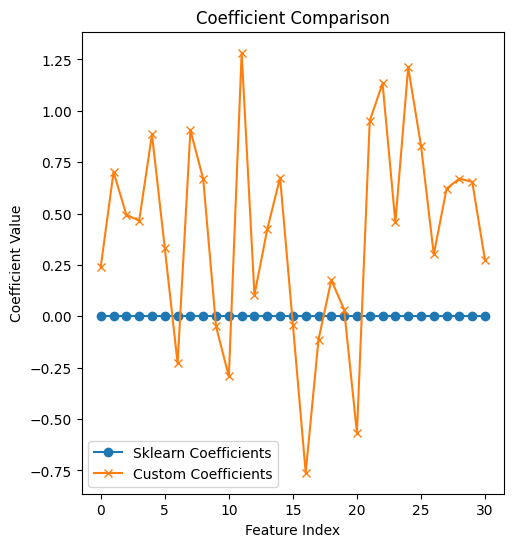

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sklearn_lr.coef_.ravel(), marker='o', label='Sklearn Coefficients')
plt.plot(theta[1:], marker='x', label='Custom Coefficients')
plt.title('Coefficient Comparison')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()

plt.show()